# Convolution of exponential decay and instrumental response function

1. Compare numerical implementation and analytic one
2. Determine irf depending detection limits for ilfetime constant with S/N = 10

For pseudo voigt profile ${fwhm}({fwhm}_G, {fwhm}_L)$ and $\eta({fwhm}_G, {fwhm}_L)$ is chosen according to
 [J. Appl. Cryst. (2000). **33**, 1311-1316](https://doi.org/10.1107/S0021889800010219)

In [54]:
# import needed module
import numpy as np
from scipy.signal import convolve
import matplotlib.pyplot as plt
import TRXASprefitpack
from TRXASprefitpack import gau_irf, cauchy_irf, voigt
from TRXASprefitpack import calc_eta, calc_fwhm
from TRXASprefitpack import exp_conv_gau, exp_conv_cauchy, exp_conv_pvoigt
plt.rcParams["figure.figsize"] = (12,9)

In [55]:
# Define exponential decay
def decay(t, k):
    return np.heaviside(t, 1)*np.exp(-k*t)

## Numerical implementation vs. Analytic implementation

for voigt instrumental response function, analytic implementation is based on pseudo voigt approximation

In [56]:
# Set decay paramter
tau = 0.5
t = np.linspace(-2.5, 2.5, 3000)
t_sample = np.hstack((np.arange(-1, -0.5, 0.1), np.arange(-0.5, 0.5, 0.05), np.linspace(0.5, 1, 6)))
decay_num = decay(t, 1/tau)

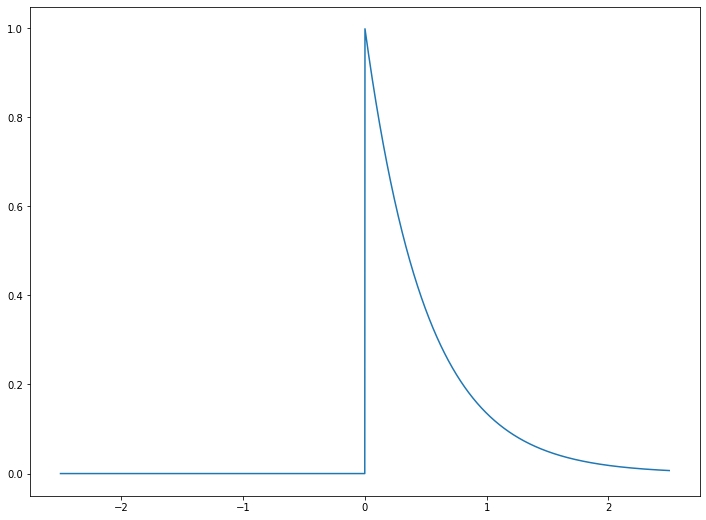

In [57]:
plt.plot(t, decay_num)
plt.show()

### Gaussian IRF

In [58]:
# Set fwhm paramter for gaussian irf
fwhm_G = 0.15
gau_irf_num = gau_irf(t, fwhm_G)

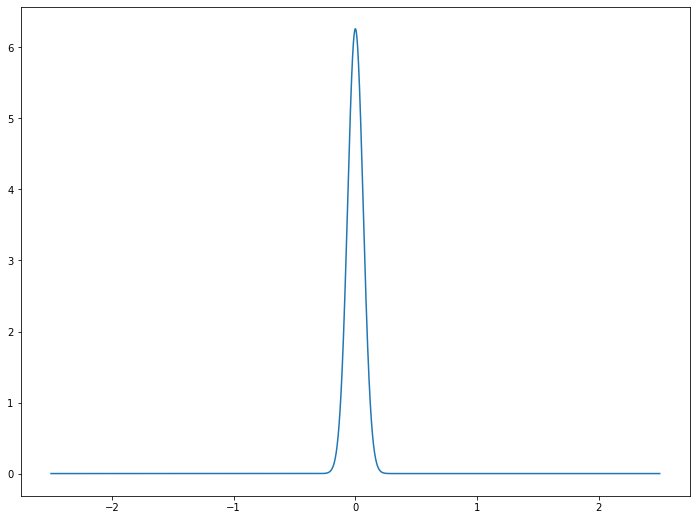

In [59]:
plt.plot(t, gau_irf_num)
plt.show()

In [60]:
# Now calculates convolution

exp_conv_gau_num = convolve(gau_irf_num, decay_num, 'same')*(t[1]-t[0]) # Numerical
exp_conv_gau_anal = exp_conv_gau(t_sample, fwhm_G, 1/tau) # analytic

In [61]:
%timeit convolve(gau_irf_num, decay_num, 'same')

286 µs ± 6.06 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [62]:
%timeit exp_conv_gau(t_sample, fwhm_G, 1/tau)

39.4 µs ± 391 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Trivally, calculation of analytic one takes much less time than numerical one.

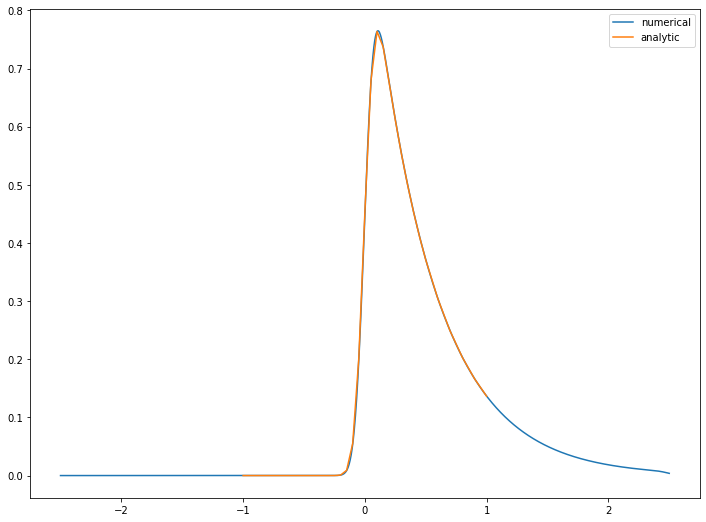

In [63]:
# Compare two implementation

plt.plot(t, exp_conv_gau_num, label='numerical')
plt.plot(t_sample, exp_conv_gau_anal, label='analytic')
plt.legend()
plt.show()

### Cauchy IRF

In [64]:
# Set fwhm paramter for cauchy irf
fwhm_L = 0.10
cauchy_irf_num = cauchy_irf(t, fwhm_L)

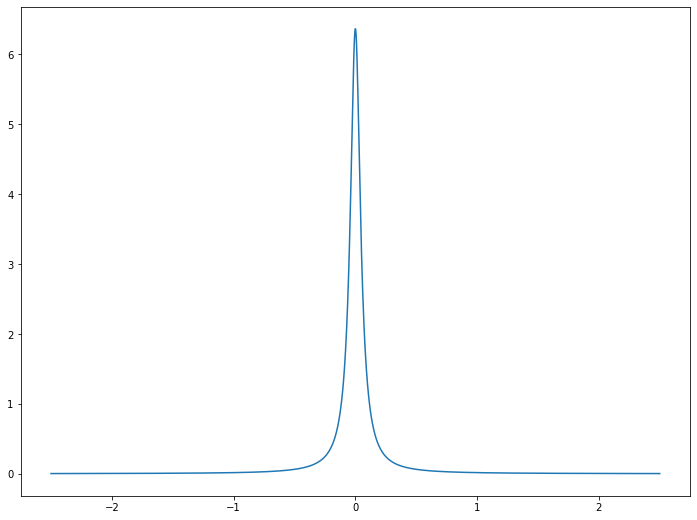

In [65]:
plt.plot(t, cauchy_irf_num)
plt.show()

In [66]:
# Now calculates convolution

exp_conv_cauchy_num = convolve(cauchy_irf_num, decay_num, 'same')*(t[1]-t[0]) # Numerical
exp_conv_cauchy_anal = exp_conv_cauchy(t_sample, fwhm_L, 1/tau) # analytic

In [67]:
%timeit convolve(cauchy_irf_num, decay_num, 'same')

281 µs ± 5.33 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [68]:
%timeit exp_conv_cauchy(t_sample, fwhm_L, 1/tau)

84.7 µs ± 799 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Analytic calculation of convolution of exponential decay and cauchy instrumental response function needs about twice much time that convolution with gaussian one. Since it needs computation of special function whoose range and domain are both complex ($\mathbb{C}$)

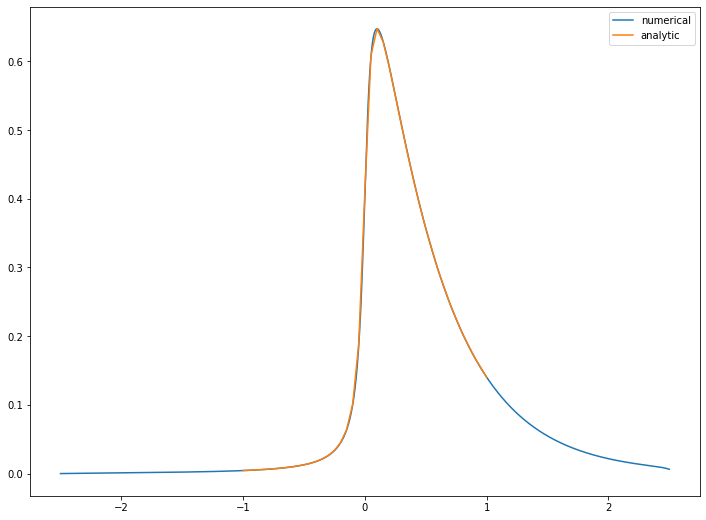

In [69]:
# Compare two implementation

plt.plot(t, exp_conv_cauchy_num, label='numerical')
plt.plot(t_sample, exp_conv_cauchy_anal, label='analytic')
plt.legend()
plt.show()

### Voigt IRF

In [70]:
# Set fwhm paramter for voigt IRF
fwhm_G = 0.10; fwhm_L = 0.05
fwhm = calc_fwhm(fwhm_G, fwhm_L)
eta = calc_eta(fwhm_G, fwhm_L)
voigt_irf_num = voigt(t, fwhm_G, fwhm_L)

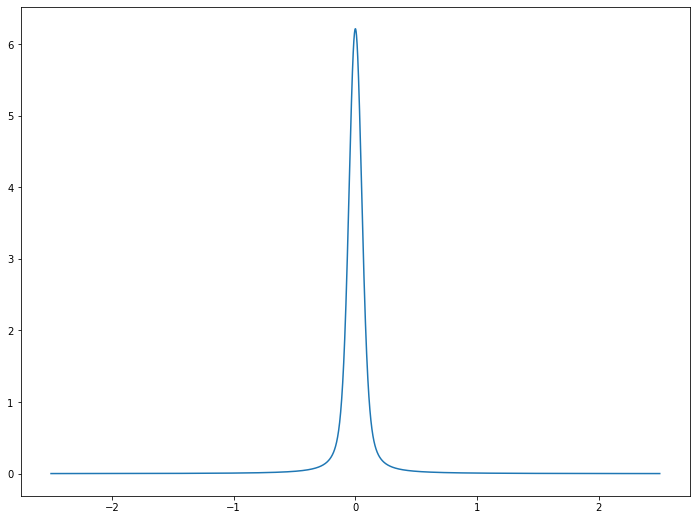

In [71]:
plt.plot(t, voigt_irf_num)
plt.show()

Voigt function is much complex than gaussian and cauchy function, so it takes much more time to compute.

In [72]:
%timeit gau_irf(t, fwhm_G)

87 µs ± 984 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [73]:
%timeit cauchy_irf(t, fwhm_L)

8.46 µs ± 176 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [74]:
%timeit voigt(t, fwhm_G, fwhm_L)

331 µs ± 5.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [75]:
# Now calculates convolution

exp_conv_voigt_num = convolve(voigt_irf_num, decay_num, 'same')*(t[1]-t[0]) # Numerical
exp_conv_pvoigt_anal = exp_conv_pvoigt(t_sample, fwhm, eta, 1/tau) # analytic

In [76]:
%timeit exp_conv_pvoigt(t_sample, fwhm, eta, 1/tau)

130 µs ± 1.31 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


As one can expected, the computation time for `exp_conv_pvoigt` is just sum of computation time for `exp_conv_gau` and `exp_conv_cauchy`.

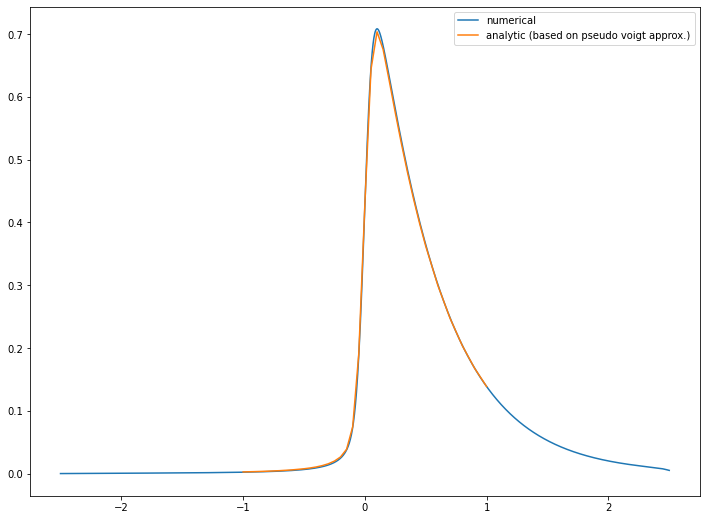

In [77]:
# Compare two implementation

plt.plot(t, exp_conv_voigt_num, label='numerical')
plt.plot(t_sample, exp_conv_pvoigt_anal, label='analytic (based on pseudo voigt approx.)')
plt.legend()
plt.show()

Analytic implementation well approximates convolution of exponential decay function and voigt instrumental response function.

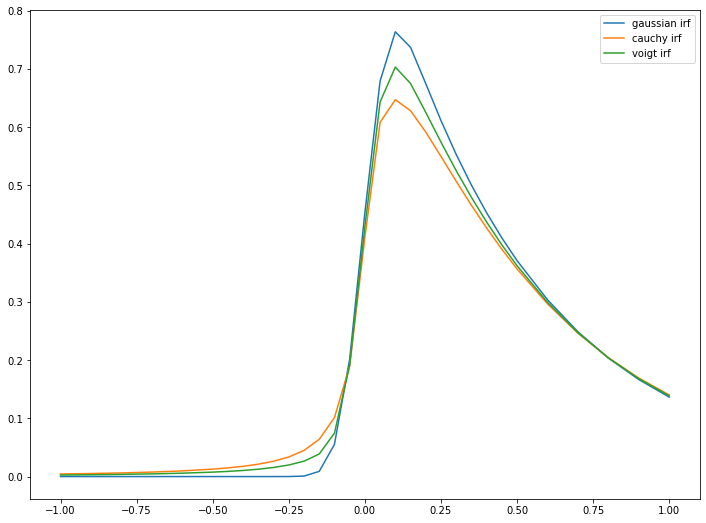

In [78]:
plt.plot(t_sample, exp_conv_gau_anal, label='gaussian irf')
plt.plot(t_sample, exp_conv_cauchy_anal, label='cauchy irf')
plt.plot(t_sample, exp_conv_pvoigt_anal, label='voigt irf')
plt.legend()
plt.show()

Convolution with gaussian gives sharpe feature near time zero.
Convolution with cauchy gives diffuse feature near time zero.
Convolution with voigt (can be approximated by pseudo voigt) gives mixture of gaussian and cauchy feature.

## Determine instrumental response function depending detection limits for lifetime constant

Assume S/N of data is 10 and use gaussian instrumental response function

In [79]:
fwhm = 0.15
tau = [fwhm/20, fwhm/10, fwhm/5, fwhm/2, fwhm, 10*fwhm, 20*fwhm]
t_sample = np.linspace(-1, 1, 201)
noise = np.random.normal(0, 1/10, t_sample.size) # define noise
model = np.empty((t_sample.size, 7))

In [80]:
# compute model
for i in range(7):
    model[:, i] = exp_conv_gau(t_sample, fwhm, 1/tau[i])

# plot model

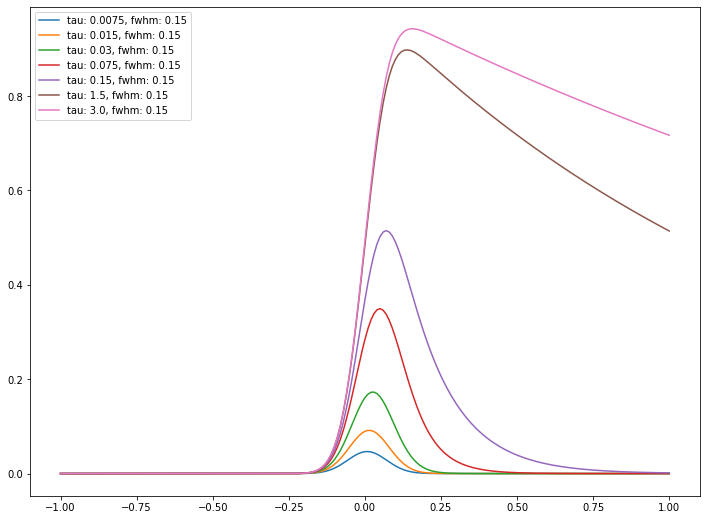

In [81]:
for i in range(7):
    plt.plot(t_sample, model[:, i], label=f'tau: {tau[i]}, fwhm: {fwhm}')
plt.legend()
plt.show()

Due to the broadening feature of gaussian instrumental response function, it is hard to detect exponential decay feature with lifetime less than full width at half maximum of irf function.

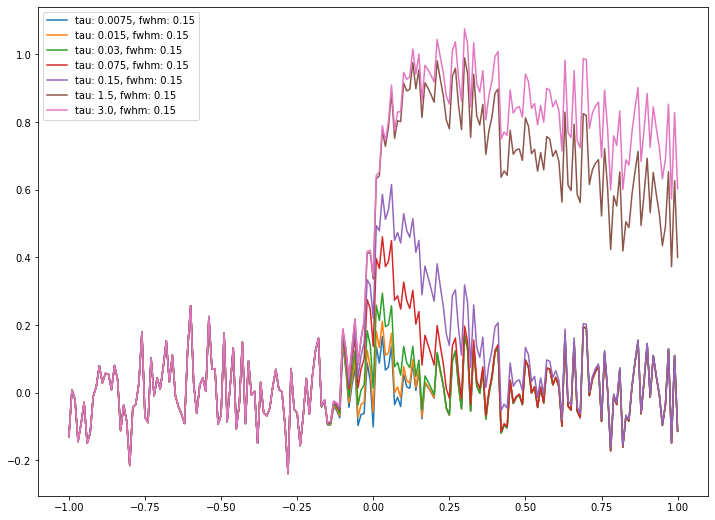

In [82]:
# plot model with noise

for i in range(7):
    plt.plot(t_sample, model[:, i]+noise, label=f'tau: {tau[i]}, fwhm: {fwhm}')
plt.legend()
plt.show()

Assuming S/N: 10, we cannot seperate exponential decay feature whoose lifetime is less than half of fwhm with random noise.